# Credit Card Fraud Detection

# Overview

Credit card fraud detection is very important for credit card companies. It is important for te companies to be able able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Data description

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues,  provide the original features and more background information about the data is not provided. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


### Given the class imbalance ratio, it is recomended to measure the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification

# Acknowledgements

The dataset is downloded from Kaggle. 
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project.


In [1]:
#importing required libaries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold


In [2]:
# Reading data 
Filename='F:\\creditCradFraud/creditcard.csv'
df = pd.read_csv(Filename)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
counts = df.Class.value_counts()
print(counts)
print(f'non_Fraudent {(counts[0] / sum(counts))*100}% and Fraudent {(counts[1] / sum(counts))*100}%')

0    284315
1       492
Name: Class, dtype: int64
non_Fraudent 99.82725143693798% and Fraudent 0.1727485630620034%


In [4]:
# Let's check the dataset for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### The dataset do not include any missing values. 

In [5]:
# let's separate the Fraudent and non-Fraudent records. Class zero corresponds to non-fraudent 
# and class 1 corresponds to fraudent records

normal_records = df[df.Class == 0]
fraud_records =df[df.Class == 1]


#### Let's first understand the distribution of the features. To visualize the distribution of the features  plotting   histogram

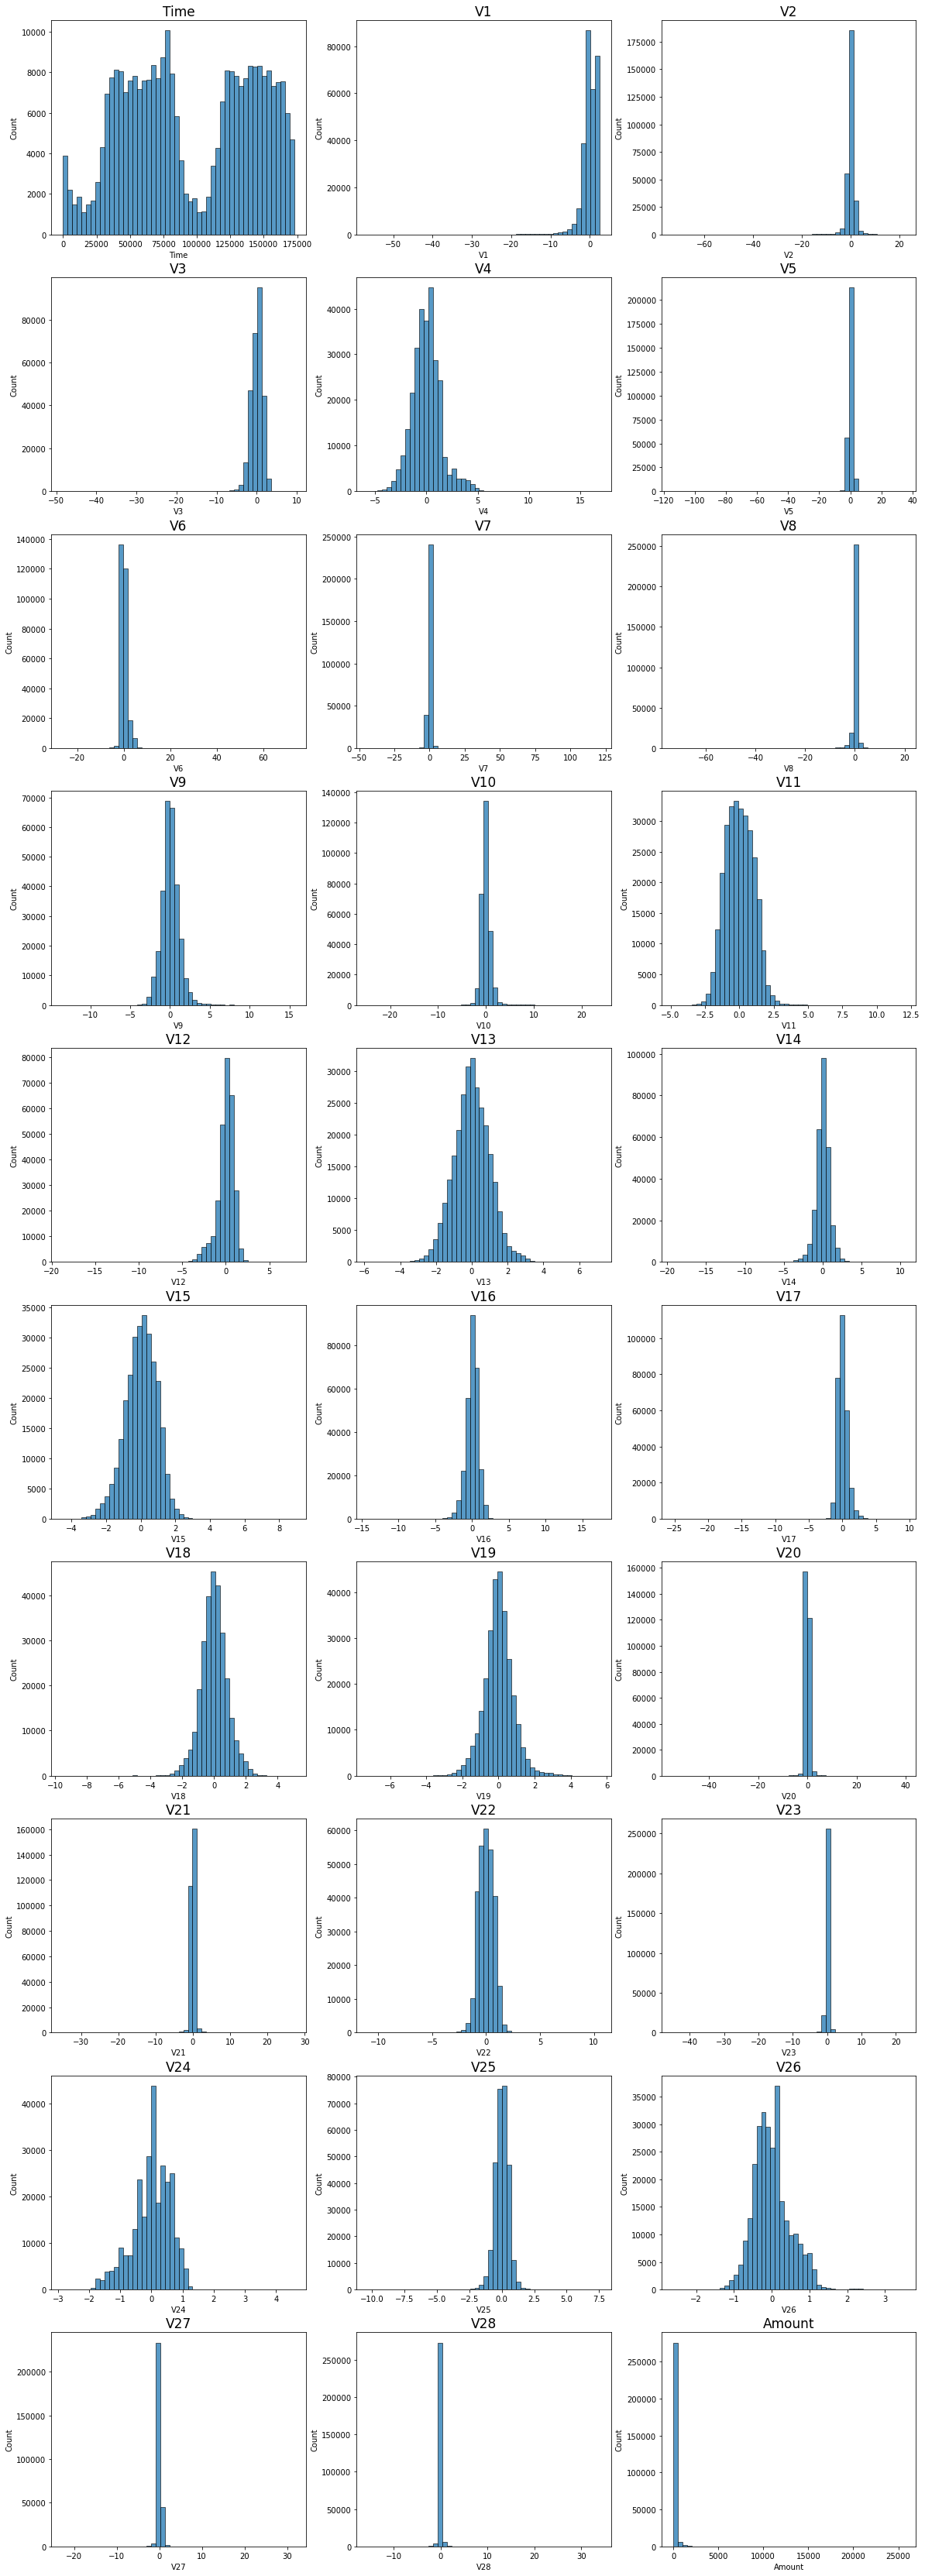

In [6]:
plt.figure(figsize=(20, 60))
for n, col in enumerate(df.drop('Class',axis=1).columns):
    plt.subplot(10,3,n+1)
    sns.histplot(df[col], bins=50)
    plt.title(col, fontsize=17)
plt.show()

##### The features are normally distributed other than Time and Amount Features.

In [7]:
# let's describe the Time, Amount for each Class 0 and Class 1 to understand better.
df[['Time','Amount','Class']].groupby('Class').describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                             Amount                                            \
            75%       max     count        mean         std  min   25%    50%   
Class                                                                           
0      139333.0  172792.0  284315.0   88.291022  250.105092  0.0  5.65  22.00   
1      128483.0  170348.0     492.0  122.211321  256.683288  0.0  1.00   9.25   

                         
          75%       max  
Class                    
0       77.05  25691.16  
1      105.89   2125.87

####  Mean transaction time is less from Fraudulent transtiction and more for non-fraudent transactions. The mean Amount is more for for Fraudulent transcation than in non-Fraudulent transaction. Threfore it seems Time and Amount have some relationship with Fraudulent and non Fraudulent transactions.

In [8]:
# checking for outliers in the Time and Amount features

In [9]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Time'>

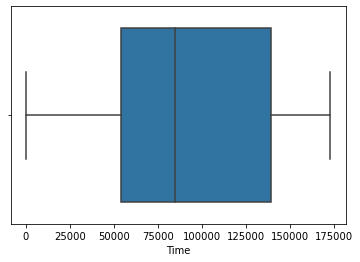

In [10]:
sns.boxplot(df['Time'])

<AxesSubplot:xlabel='Amount'>

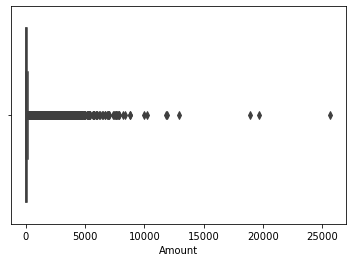

In [11]:
sns.boxplot(df['Amount'])

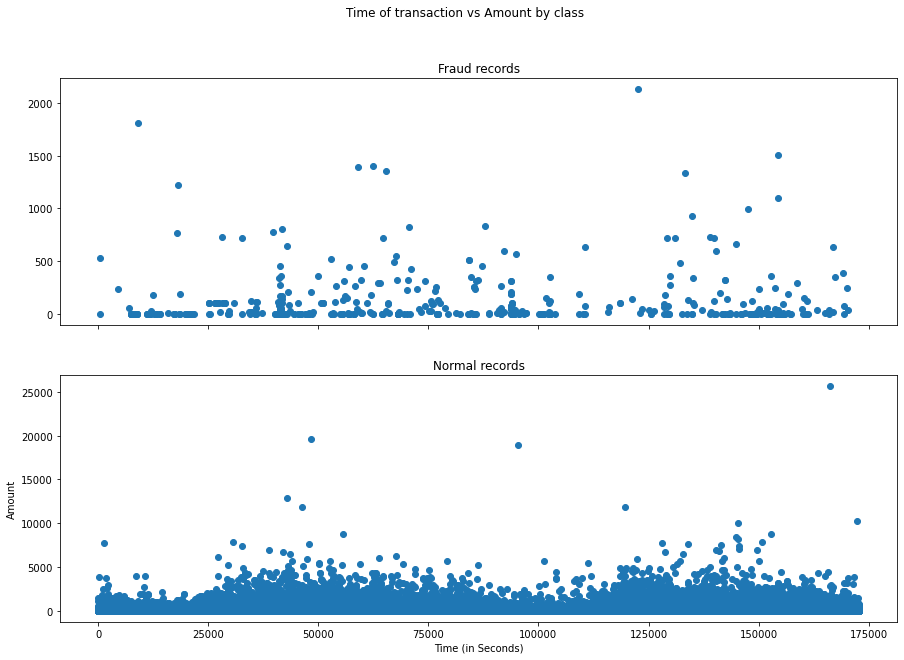

In [12]:
# to understand better about Time and Amount features, let's separate Fraudulent and normal records and
# analyse time of transaction Vs Amount scatter plot.
plt.rcParams["figure.figsize"] = [15,10]
f, (ax1, ax2) = plt.subplots(2, 1, sharex= True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud_records.Time, fraud_records.Amount)
ax1.set_title('Fraud records')
ax2.scatter(normal_records.Time, normal_records.Amount)
ax2.set_title('Normal records')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [13]:
df[df.Amount > 10000].shape

(7, 31)

#### The scatter plots show that, all the fraud records are below the amount 3000. Also, there are only 7 records with amount greater than 10000 and all of them belongs to normal records. Since, no fraud records  exits beyond the Amount 10000 , I can delete all  records that are having amounts value greater than 10000.


In [14]:
df = df.drop(df[df.Amount > 10000].index, axis=0)

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
# separate independent and Dependent Features
x=df.drop('Class', axis=1)     # dependent feature
y=df.Class.values              # Store the target variable we are predicting 

## Checking for corelation 

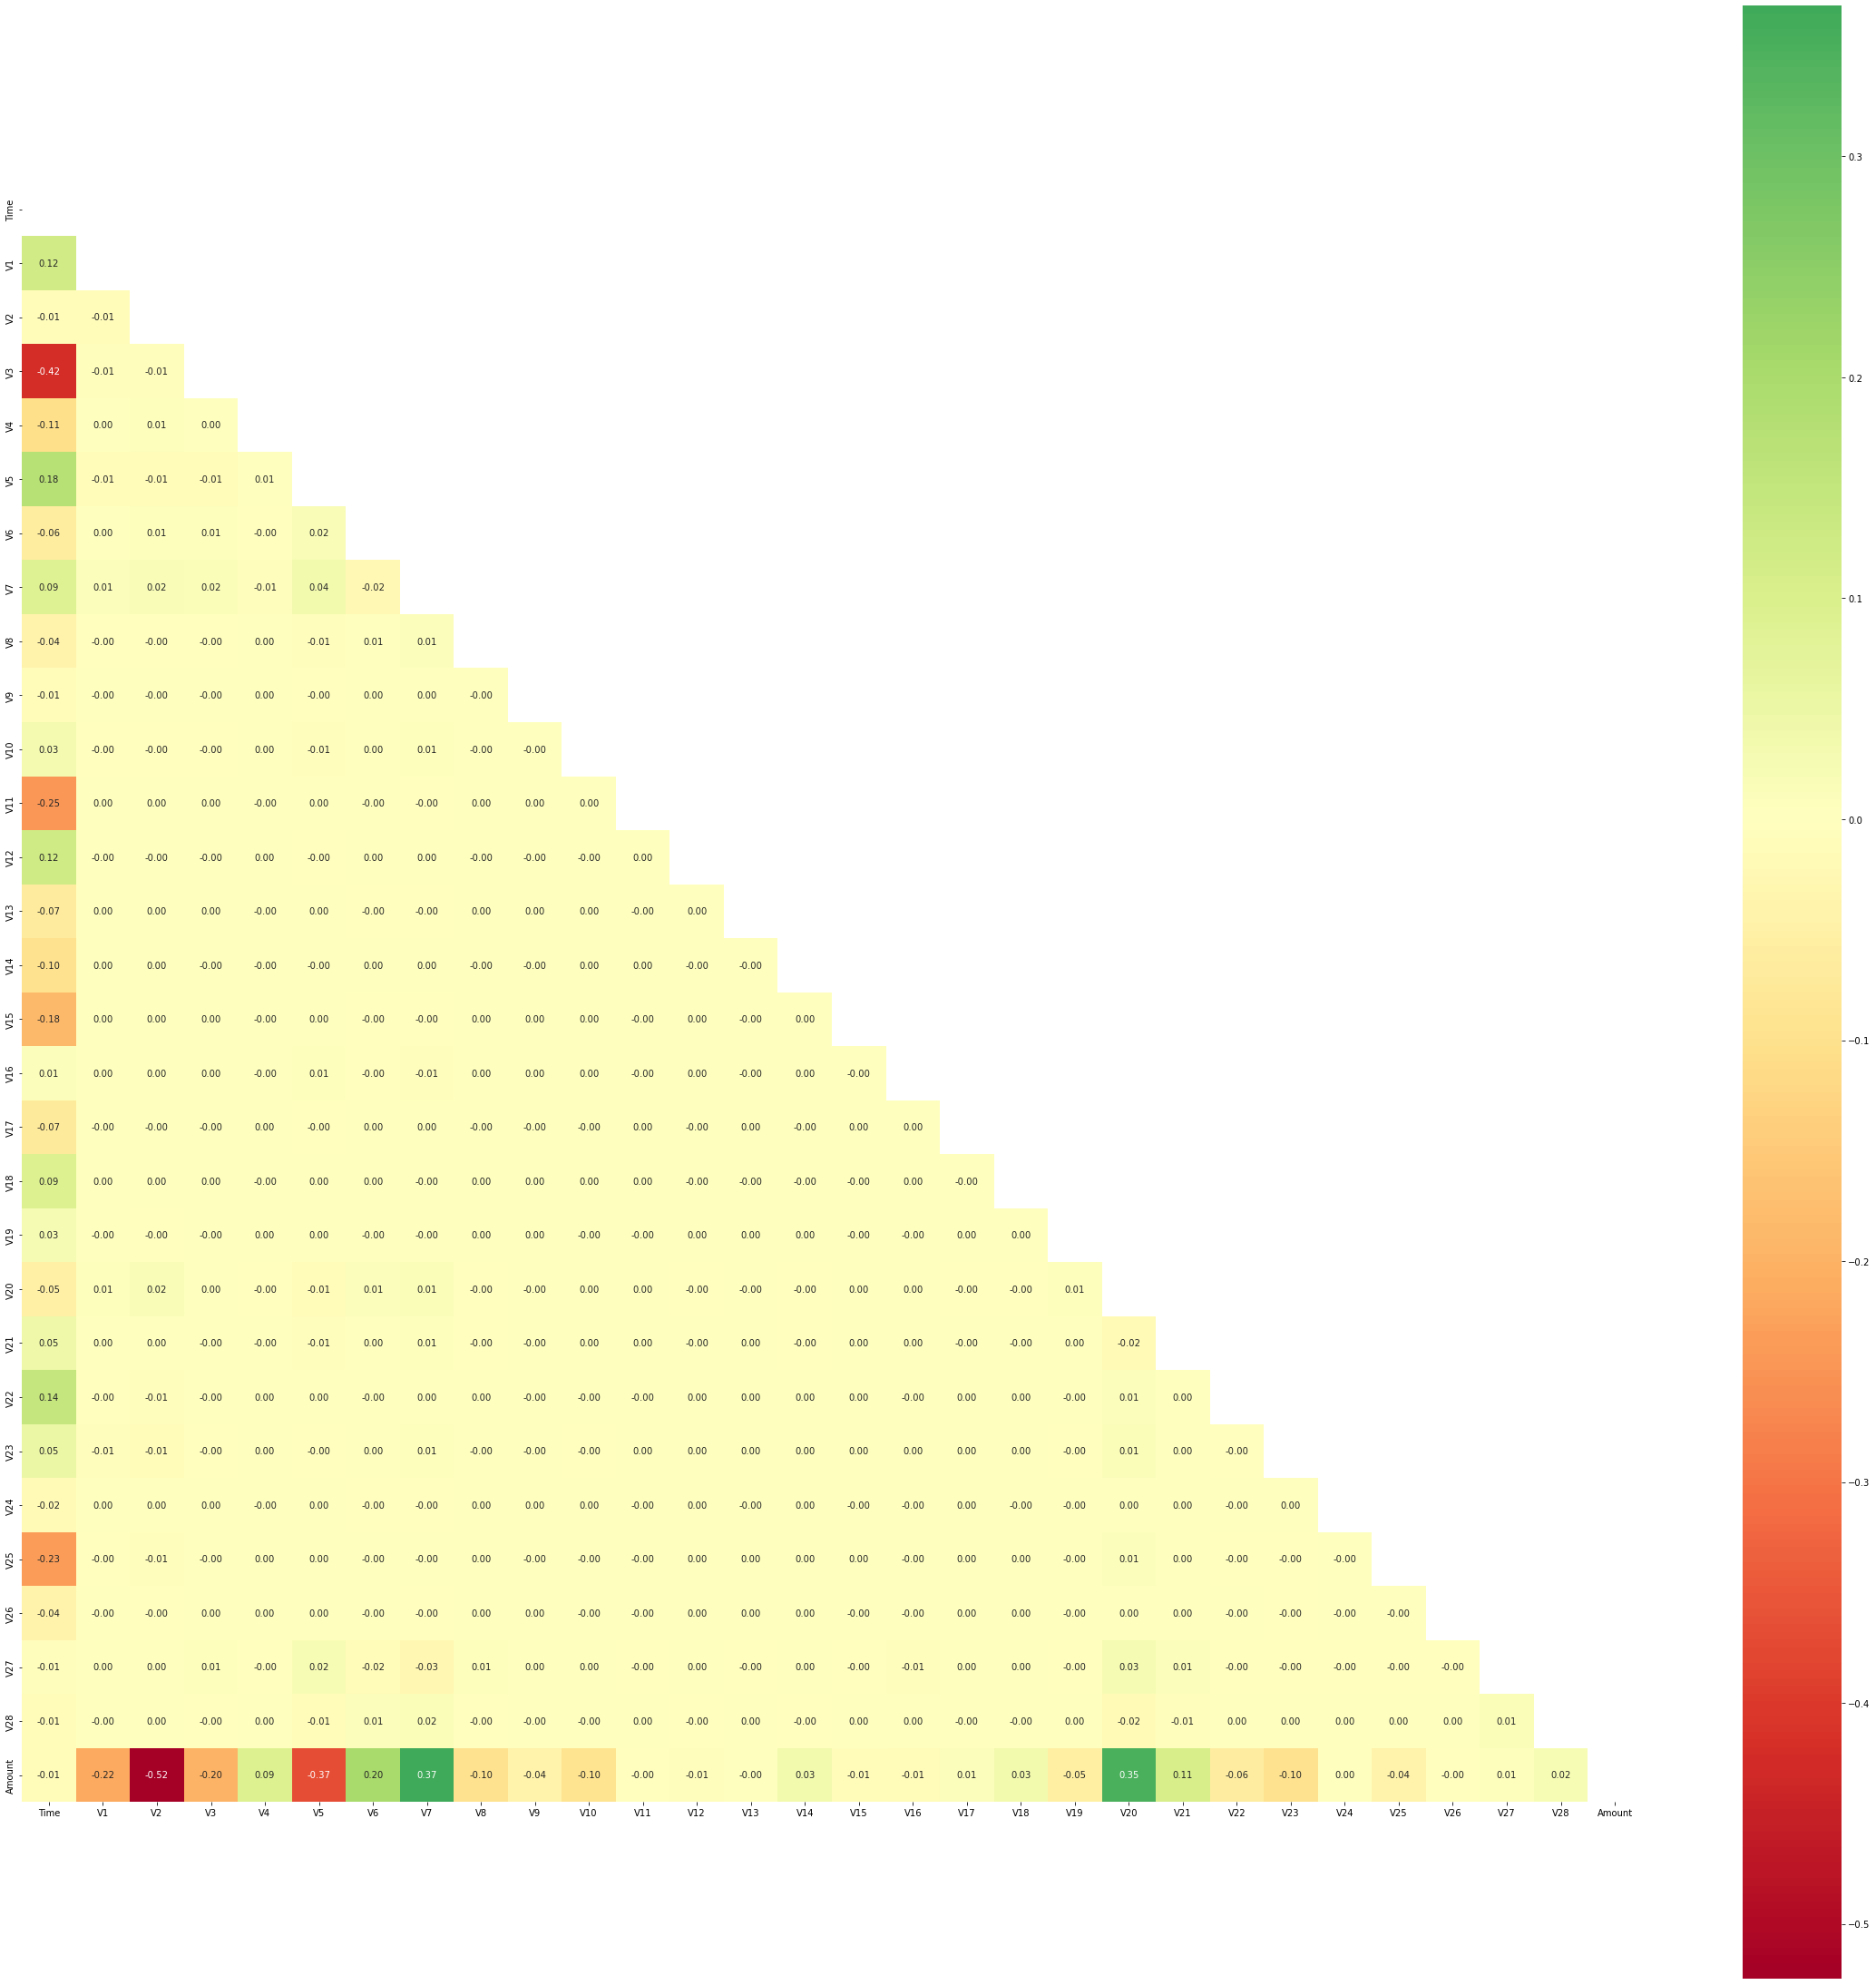

In [17]:
cormatrix = x.corr()
# Create a mask
mask = np.triu(np.ones_like(cormatrix, dtype=bool))
plt.figure(figsize=(40, 40))
sns.heatmap(cormatrix, mask=mask, center=0, annot=True,
              fmt='.2f', square=True, cmap="RdYlGn")
plt.show();

#### The correlation matrix shows that there are some corereated features present but the correlation is  not strong enough to drop the features.

### we need to check the importance of the feature in predicting if a new records belongs to Fraudulent or non-Fraudulent ..to check the importance of features I used the coefficients of logistic regression model with L2 regulaization. 
##### The ‘liblinear’ solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty

In [18]:
from sklearn.linear_model import LogisticRegression

reg_model = LogisticRegression(max_iter=200,random_state=12, solver='liblinear')
reg_model.fit(x,y)

LogisticRegression(max_iter=200, random_state=12, solver='liblinear')

In [19]:
# coefficient matrix
coefficients = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(reg_model.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance of Coefficient']
coefficients.sort_values(by='Importance of Coefficient', inplace=True)
print(coefficients)


   Feature  Importance of Coefficient
3       V3                  -0.793137
14     V14                  -0.694218
2       V2                  -0.483858
17     V17                  -0.439679
15     V15                  -0.427660
9       V9                  -0.388334
8       V8                  -0.374233
25     V25                  -0.356116
13     V13                  -0.306448
16     V16                  -0.294582
11     V11                  -0.286547
10     V10                  -0.207003
27     V27                  -0.088803
6       V6                  -0.054040
24     V24                  -0.024425
29  Amount                  -0.005582
0     Time                  -0.000071
12     V12                   0.018517
19     V19                   0.026484
28     V28                   0.027774
18     V18                   0.031098
5       V5                   0.057527
26     V26                   0.060713
23     V23                   0.067693
20     V20                   0.091969
4       V4  

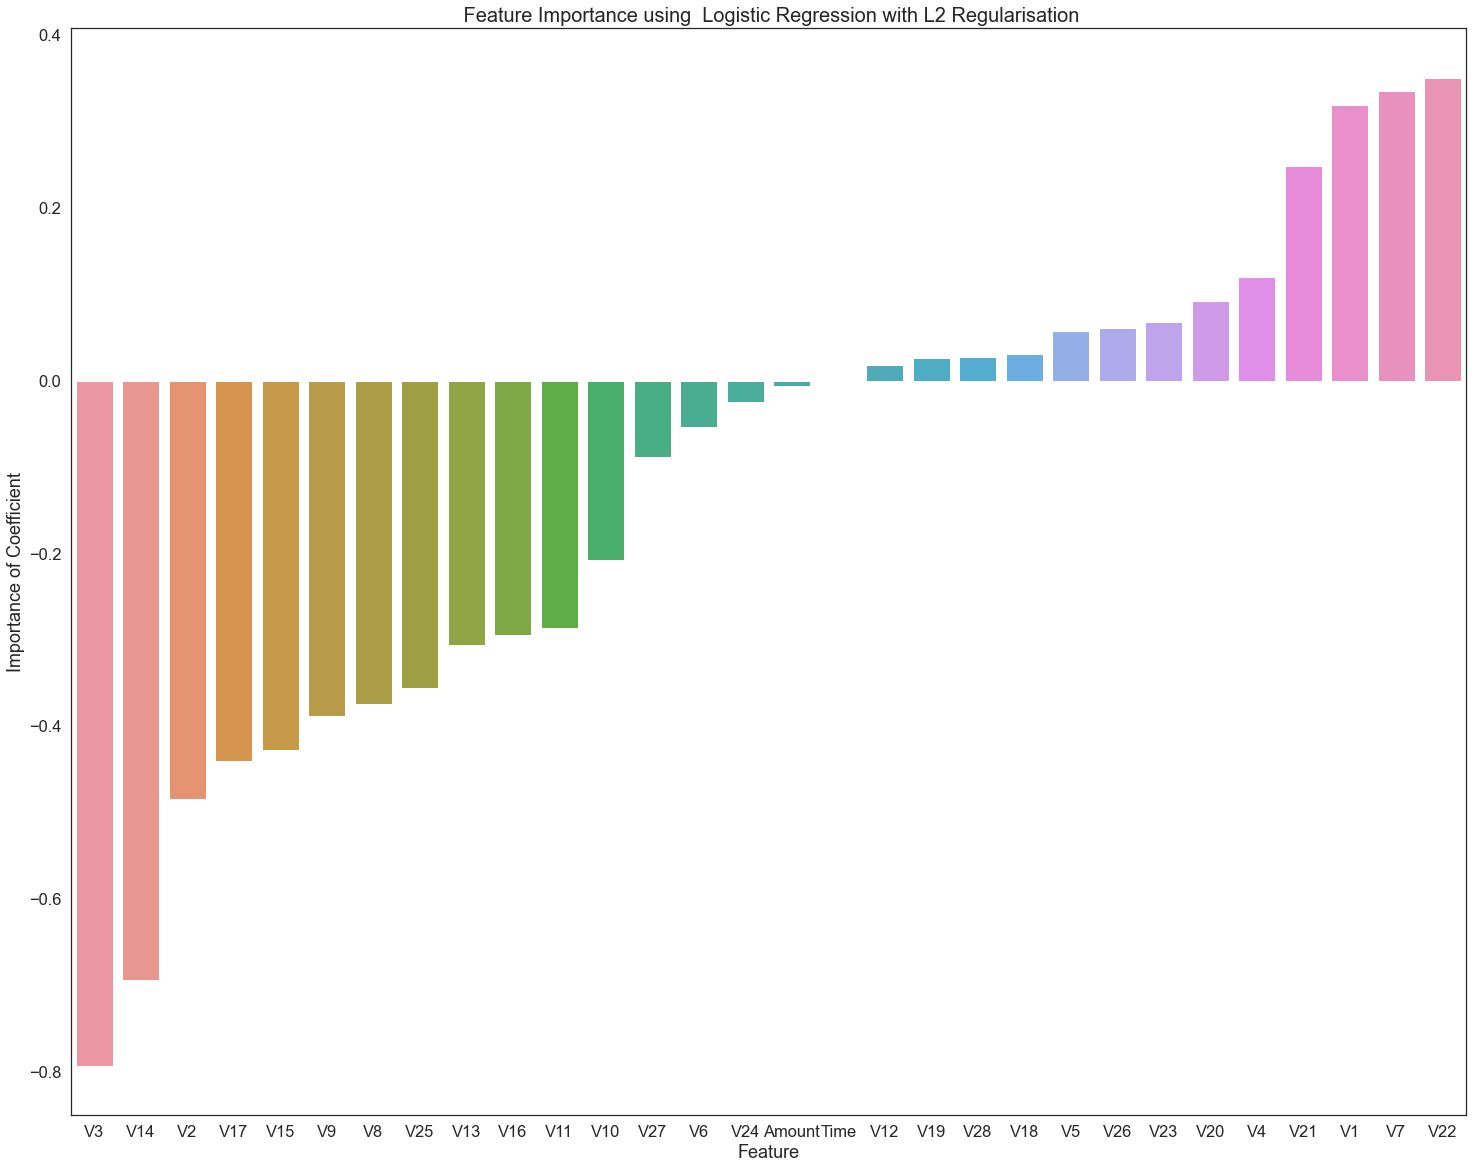

In [20]:
# Plotting coefficient values
plt.figure(figsize=(25,20))
sns.set(style="white", font_scale=1.5)
#sns.set(font_scale = 1)
sns.barplot(x='Feature', y='Importance of Coefficient', data=coefficients)
plt.title(" Feature Importance using  Logistic Regression with L2 Regularisation", fontsize=20)
plt.show()

### The Importance of coefficient of Amount and Time features are near to zero.  Therefore, there are no sifnificant relations between Class with Amount and Time as expected from the previous analysis of Time and Amount features. 
We can  remove thsese to features

In [21]:
x.drop(['Time', 'Amount'], axis=1, inplace=True)

In [22]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [23]:
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [24]:
df.head().shape

(5, 29)

### Here we are done with EDA. In EDA part we see that 
- The dataset look clean with no missing values.
- The histogarm shows that most of features are well normally  distributed around mean
- The correlation between the features are not strong enough to drop them. And 
- The Dataset is highly imbalanced. 

#### Resampling stratergy

Since the dataset is highly imbalanced we need to resample the dataset to make it balanced. As we see in data analysis section that the Fraudulent transactions are only 0.17% from entire the dataset, the direct oversampling or under sampling will not work for the dataset. To solve this issue,  I mixed up oversampling and under-sampling. To cover more data points from non-fraudulent, I oversample records from fraudulent transactions and undersample  non-fraudulent transactions records. 
1. Lets take random 5% from non-fraudulent transactions
2. Then will oversample fraudulent transactions to match with non-fraudulent


In [25]:
# Since dataset is highly unbalanced we can use under sampling or mix oef under and over sampling to increase number of sample
leg_df= df[df.Class==0]
fraud_df= df[df.Class==1]

In [26]:
number_of_samples=round(leg_df.shape[0]*0.5)
number_of_samples

142154

In [27]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

In [28]:
leg_df_2 = resample(leg_df, n_samples=number_of_samples, random_state=15)
leg_df_2.describe()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,142154.000000,142154.000000,142154.000000,142154.000000,142154.000000,142154.000000,142154.000000,142154.000000,142154.000000,142154.000000,...,142154.000000,142154.000000,142154.000000,142154.000000,142154.000000,142154.000000,142154.000000,142154.000000,142154.000000,142154.0
mean,0.017853,-0.006528,0.010326,-0.006292,0.012130,0.001005,0.006929,0.002573,0.003220,0.011887,...,-0.001910,-0.003239,-0.000669,-0.000018,-0.002502,0.001071,0.000833,-0.000205,-0.000615,0.0
std,1.922633,1.629577,1.451317,1.394347,1.331473,1.322879,1.147024,1.144193,1.089350,1.040353,...,0.748288,0.705885,0.720327,0.662595,0.607580,0.520038,0.481367,0.390106,0.299178,0.0
min,-40.470142,-50.383269,-33.680984,-5.683171,-31.356750,-23.496714,-31.764946,-73.216718,-6.290730,-14.741096,...,-23.646890,-34.830382,-8.593642,-44.807735,-2.836627,-10.295397,-1.778061,-9.845808,-8.656570,0.0
25%,-0.910415,-0.599395,-0.889801,-0.846297,-0.684952,-0.768924,-0.555844,-0.209119,-0.644281,-0.533019,...,-0.211511,-0.228324,-0.541783,-0.160844,-0.358693,-0.316835,-0.325916,-0.070598,-0.052880,0.0
50%,0.029982,0.062086,0.181693,-0.020360,-0.050542,-0.272809,0.040805,0.022170,-0.052120,-0.092167,...,-0.063147,-0.031939,0.005646,-0.011081,0.040703,0.016633,-0.052005,0.001321,0.011196,0.0
75%,1.319788,0.799510,1.026209,0.737066,0.615952,0.398806,0.569089,0.324953,0.600522,0.459362,...,0.131212,0.183571,0.528523,0.147349,0.439705,0.350336,0.240840,0.089110,0.077675,0.0
max,2.451888,18.902453,4.226108,12.699542,34.099309,21.307738,31.527244,18.282168,9.125535,15.331742,...,23.643417,22.614889,10.503090,22.528412,4.014444,6.070850,3.220178,9.200883,15.870474,0.0


In [29]:
df_sampled= pd.concat([leg_df_2, fraud_df], axis=0 )

In [30]:
X_sampled=df_sampled.drop('Class' , axis=1)
Y_sampled= df_sampled.Class

In [31]:
RanOsamp=RandomOverSampler(random_state=40)

In [32]:
x,y=RanOsamp.fit_resample(X_sampled,Y_sampled)

In [33]:
y.value_counts()

0    142154
1    142154
Name: Class, dtype: int64

In [ ]:
# splitting train and test dataset

In [34]:
x_train,x_test, y_train, y_test=train_test_split(x,y, stratify=y, random_state=12 )

In [35]:
y_test.value_counts(), y_train.value_counts()

(1    35539
 0    35538
 Name: Class, dtype: int64,
 0    106616
 1    106615
 Name: Class, dtype: int64)

### Model building and evaluation 

In [36]:
# First I define model evalution criteria and create a dataframe

In [37]:
Columns= ['Model', 'accuracy score', 'Precision', 'Recall', 'f1_score']
evaluation_df=pd.DataFrame(columns=Columns)
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score


In [38]:
import sklearn.metrics as metrics

# Created a common function to print results (prediction, confusion matrix, roc curve, scores) from models

def print_results(model_name,  y_test, y_pred, pred_prob=None):
    print(model_name)
    print('--------------------------------------------------------------------------')
 
    precision_score = metrics.precision_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)
    
    accuracy_score  = metrics.accuracy_score(y_test,y_pred)
    print(f'accuracy score :{accuracy_score}') 

    f1_score = metrics.f1_score(y_test,y_pred)
    
    classification_report = metrics.classification_report(y_test,y_pred)
    print(classification_report)
    
#   save scores into the dataframecevaluation_df that I createdcearlier  for comparison
   
    evaluation_df.loc[len(evaluation_df.index)] = [model_name,accuracy_score,precision_score,recall_score, f1_score]
    
    Plot_confusion_matrix(y_test,y_pred,model_name)
    
    if pred_prob is not None:
        Plot_roc_curve(y_test,pred_prob,model_name,accuracy_score)
    

In [39]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y, pred, model_name):
    cm = metrics.confusion_matrix(y, pred)
    plt.clf()
    plt.imshow(cm, cmap=plt.cm.Accent)
    categoryNames = ['Non-Fraudulent','Fraudulent']
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

In [40]:
# Created a common function to plot roc curve
def Plot_roc_curve(y, y_prob, model_name, score):
    plt.title(f'ROC Curve - {model_name}')
    fpr, tpr, thresholds = metrics.roc_curve(y, y_prob)
    plt.plot(fpr,tpr,label="Test, auc="+str(score))
    plt.legend(loc=4)
    plt.show()
 

#### Logistic Regression

Logistic Regression
--------------------------------------------------------------------------
accuracy score :0.947732740548982
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     35538
           1       0.98      0.92      0.95     35539

    accuracy                           0.95     71077
   macro avg       0.95      0.95      0.95     71077
weighted avg       0.95      0.95      0.95     71077



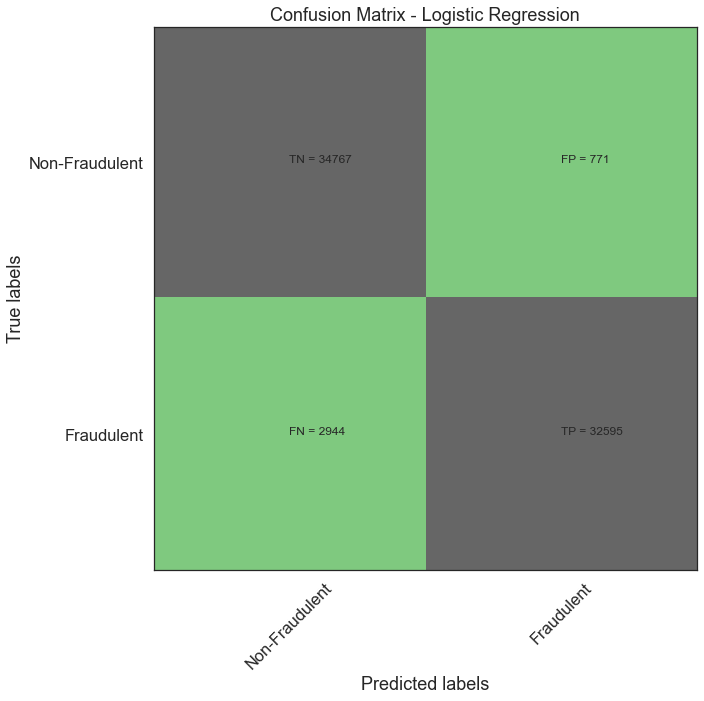

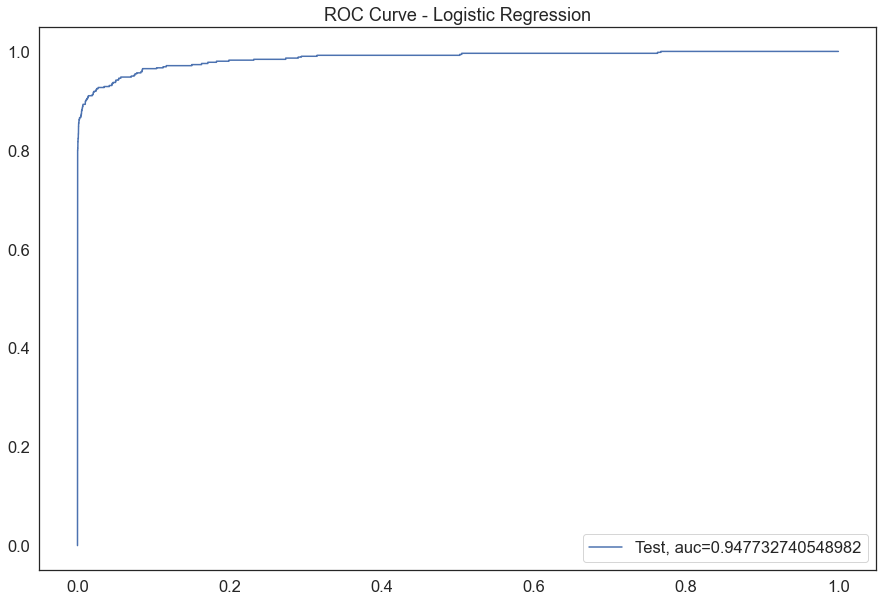

In [41]:
lr_model = LogisticRegression(max_iter=400,random_state=12)
lr_model.fit(x_train,y_train)
pred1 = lr_model.predict(x_test)
prob1 = lr_model.predict_proba(x_test)
print_results("Logistic Regression", y_test, pred1,prob1[:,-1])

Logistic Regression CV
--------------------------------------------------------------------------
accuracy score :0.947732740548982
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     35538
           1       0.98      0.92      0.95     35539

    accuracy                           0.95     71077
   macro avg       0.95      0.95      0.95     71077
weighted avg       0.95      0.95      0.95     71077



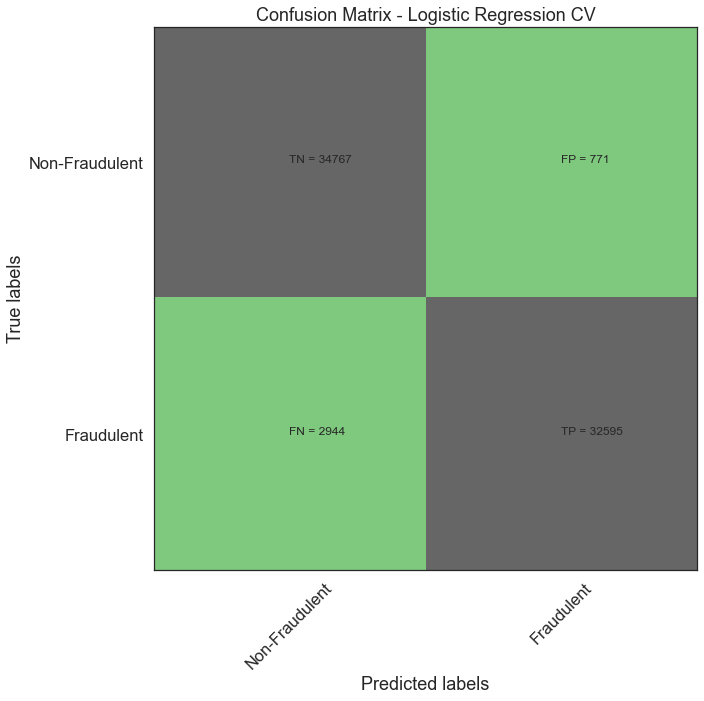

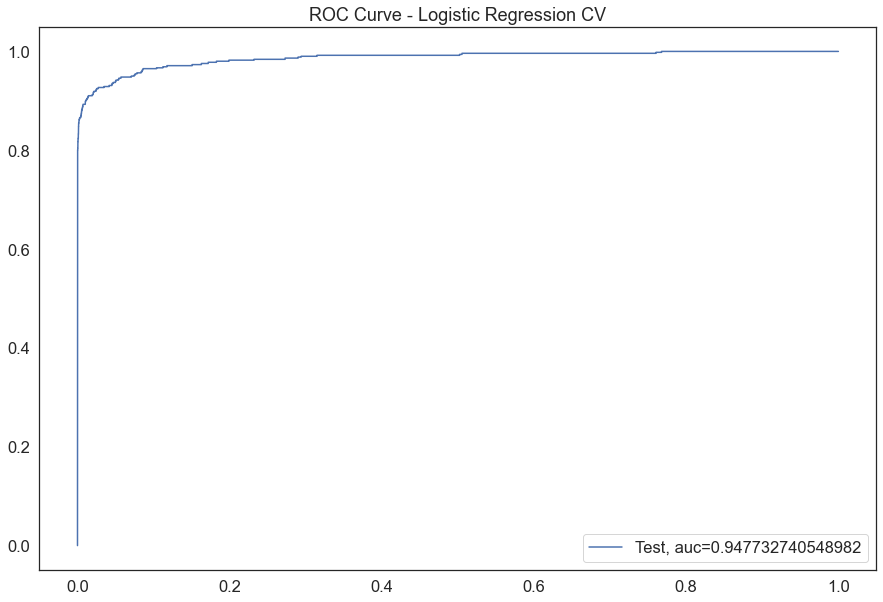

In [42]:
from sklearn.linear_model import LogisticRegressionCV

cv_num = KFold(n_splits=10, shuffle=True, random_state=12)
lr_modelCV = LogisticRegressionCV(max_iter=400,penalty='l2',scoring='roc_auc',cv=cv_num,tol=10,random_state=12)
lr_modelCV.fit(x_train,y_train)
pred2 = lr_modelCV.predict(x_test)
prob2 = lr_modelCV.predict_proba(x_test)
print_results("Logistic Regression CV", y_test, pred2,prob2[:,-1])

#### Bernoulli Naive Bayes Classifier

Bernoulli Naive Bayes
--------------------------------------------------------------------------
accuracy score :0.9014027041096276
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     35538
           1       0.99      0.81      0.89     35539

    accuracy                           0.90     71077
   macro avg       0.91      0.90      0.90     71077
weighted avg       0.91      0.90      0.90     71077



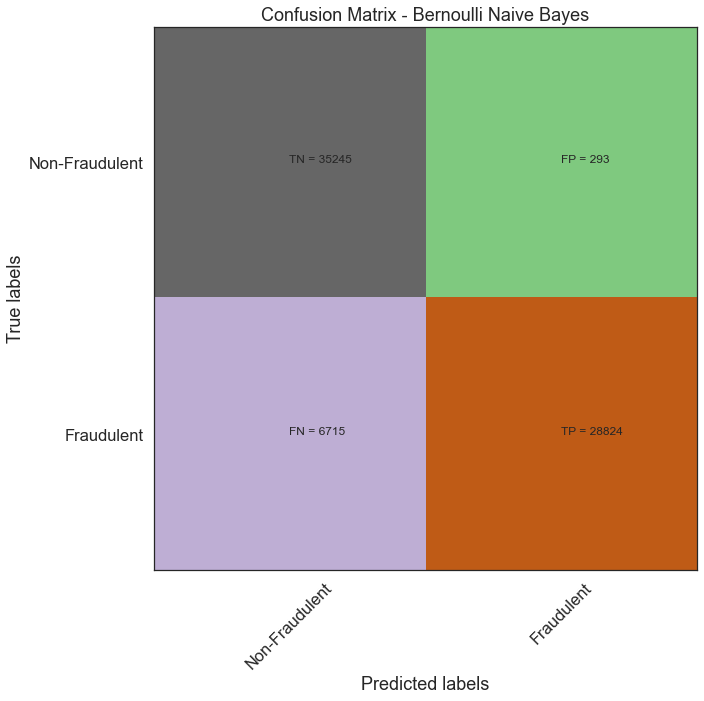

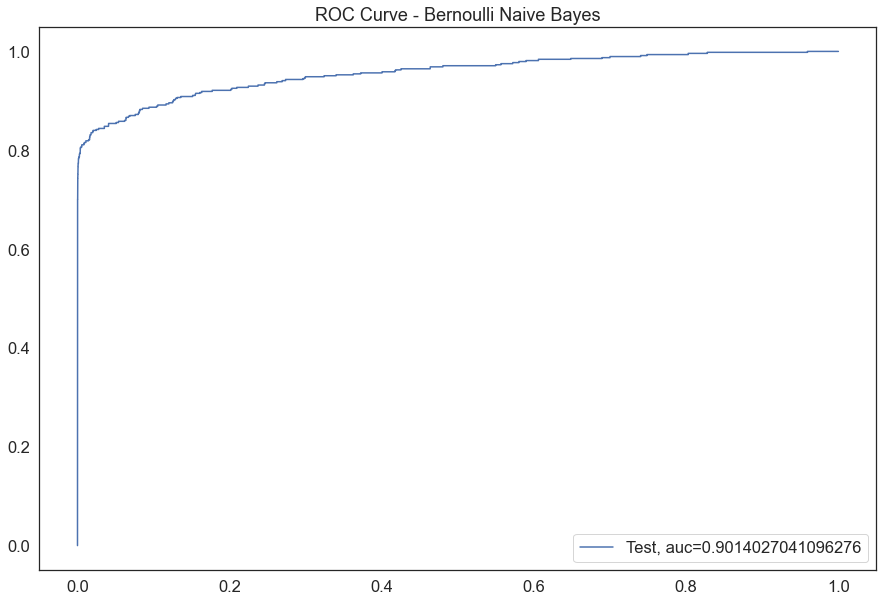

In [43]:
from sklearn.naive_bayes import BernoulliNB
gnb_model = BernoulliNB()
gnb_model.fit(x_train,y_train)
pred3 = gnb_model.predict(x_test)
prob3 = gnb_model.predict_proba(x_test)
print_results("Bernoulli Naive Bayes", y_test, pred3,prob3[:,-1])

Random Forest Classifier + gini
--------------------------------------------------------------------------
accuracy score :0.9999577922534716
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35538
           1       1.00      1.00      1.00     35539

    accuracy                           1.00     71077
   macro avg       1.00      1.00      1.00     71077
weighted avg       1.00      1.00      1.00     71077



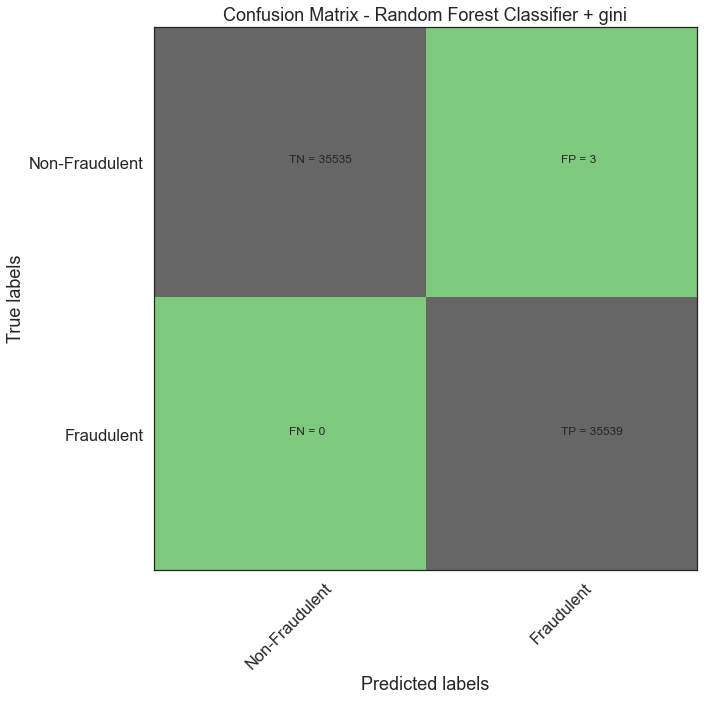

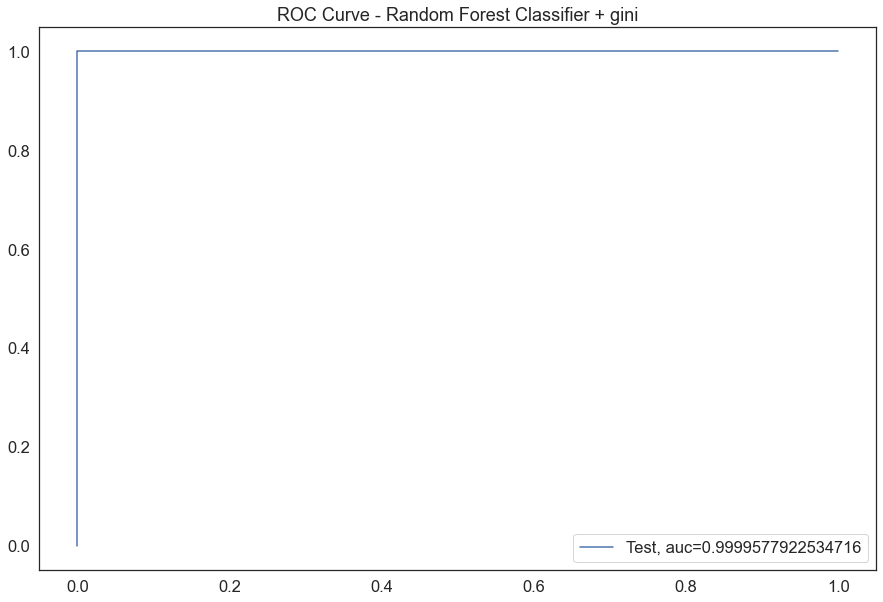

Random Forest Classifier + entropy 
--------------------------------------------------------------------------
accuracy score :0.9999577922534716
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35538
           1       1.00      1.00      1.00     35539

    accuracy                           1.00     71077
   macro avg       1.00      1.00      1.00     71077
weighted avg       1.00      1.00      1.00     71077



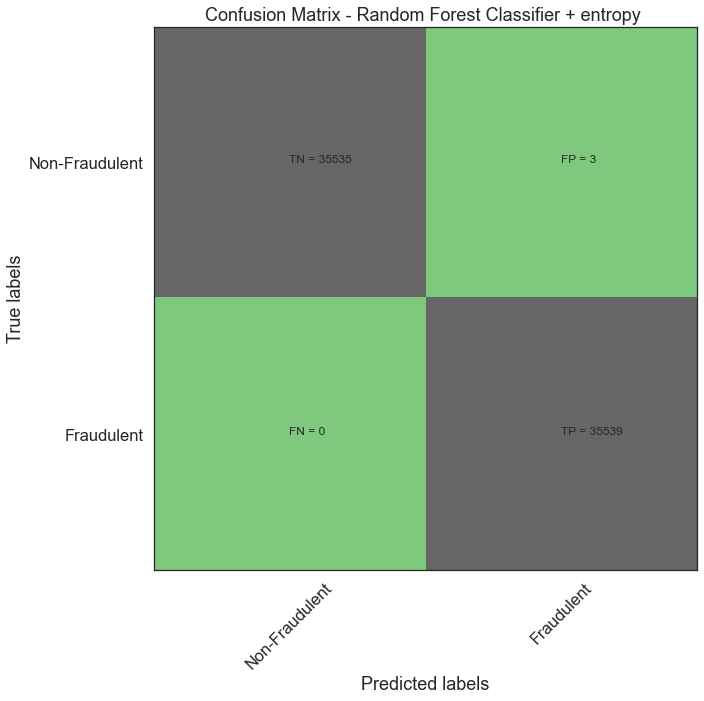

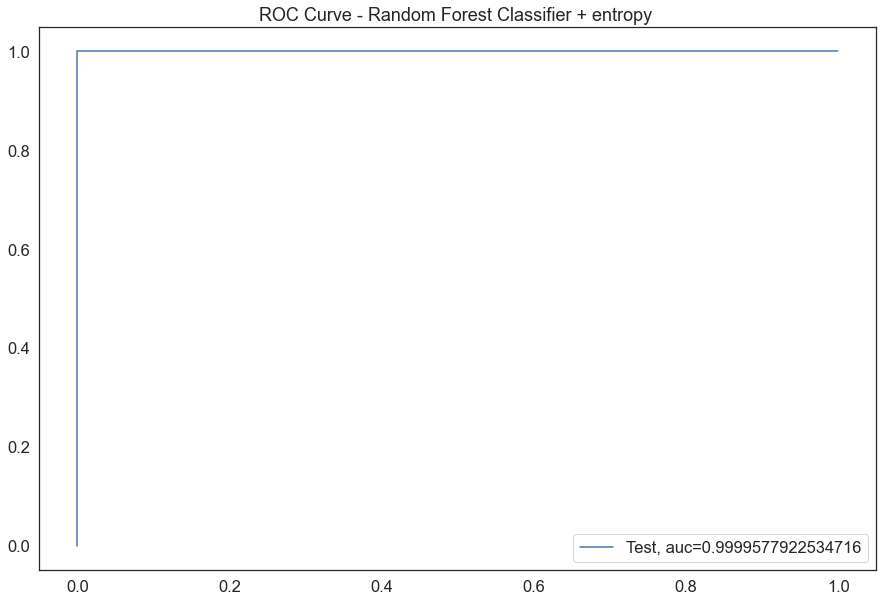

In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(bootstrap = True,
                                max_features = 'sqrt', random_state=12)
rfc_model.fit(x_train,y_train)
pred5 = rfc_model.predict(x_test)
prob5 = rfc_model.predict_proba(x_test)
print_results("Random Forest Classifier + gini", y_test, pred5,prob5[:,-1])

rfc_model2 = RandomForestClassifier(bootstrap = True,criterion='entropy',max_features = 'sqrt', random_state=12)
rfc_model2.fit(x_train,y_train)
pred6 = rfc_model2.predict(x_test)
prob6 = rfc_model2.predict_proba(x_test)
print_results("Random Forest Classifier + entropy ", y_test, pred6,prob6[:,-1])

#### Bagging Classifier

Bagging Classifier
--------------------------------------------------------------------------
accuracy score :0.9998874460092576
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35538
           1       1.00      1.00      1.00     35539

    accuracy                           1.00     71077
   macro avg       1.00      1.00      1.00     71077
weighted avg       1.00      1.00      1.00     71077



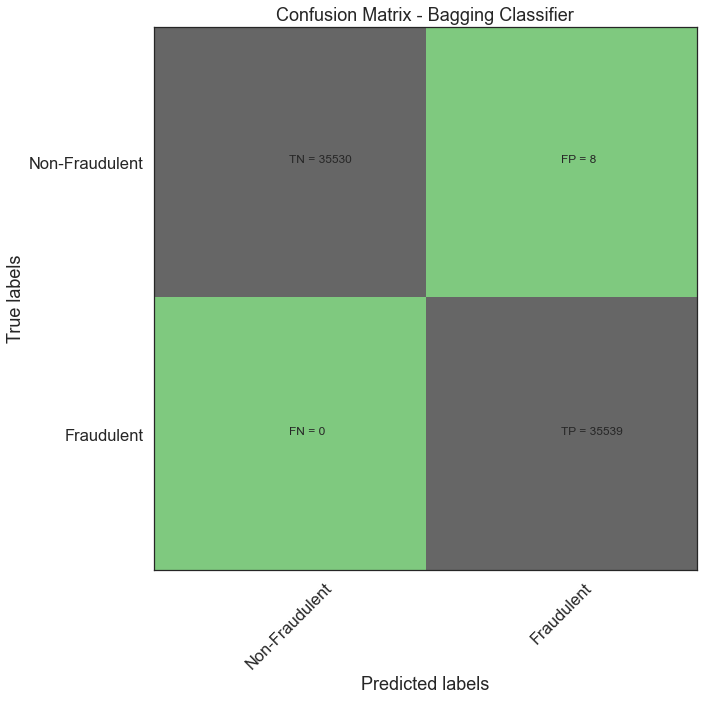

In [45]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

bcf_model = BaggingClassifier(DecisionTreeClassifier(),
                              n_estimators=200,
                              max_samples=0.8,
                              max_features=0.8,
                              oob_score=True,
                              random_state=12)
bcf_model.fit(x_train,y_train)
pred2 = bcf_model.predict(x_test)
print_results("Bagging Classifier", y_test, pred2)

Gradient Boosting Classifier
--------------------------------------------------------------------------
accuracy score :0.9935562840299956
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     35538
           1       0.99      1.00      0.99     35539

    accuracy                           0.99     71077
   macro avg       0.99      0.99      0.99     71077
weighted avg       0.99      0.99      0.99     71077



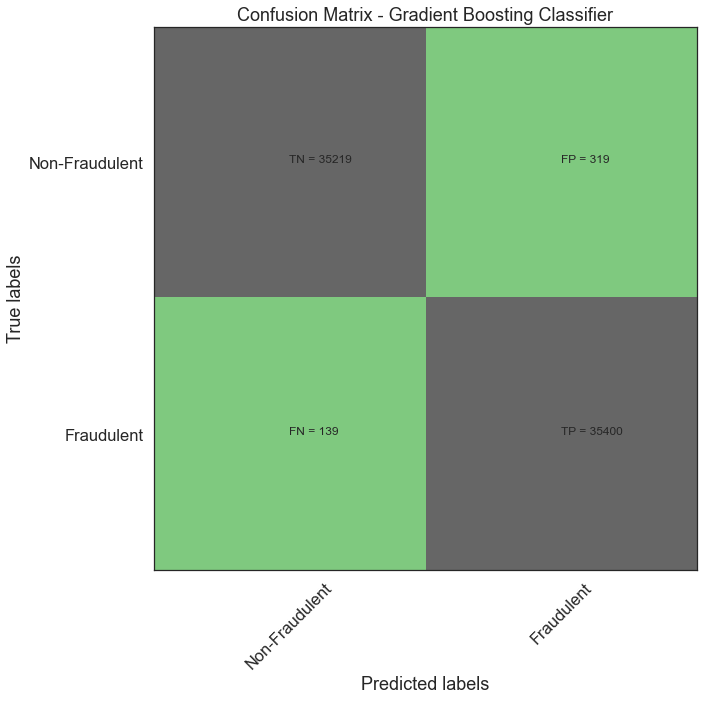

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier()
gbc_model.fit(x_train,y_train)
pred = gbc_model.predict(x_test)
pred_prob = gbc_model.predict_proba(x_test)
print_results("Gradient Boosting Classifier", y_test, pred)

Ada Boost Classifier
--------------------------------------------------------------------------
accuracy score :0.9970876654895395
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     35538
           1       0.99      1.00      1.00     35539

    accuracy                           1.00     71077
   macro avg       1.00      1.00      1.00     71077
weighted avg       1.00      1.00      1.00     71077



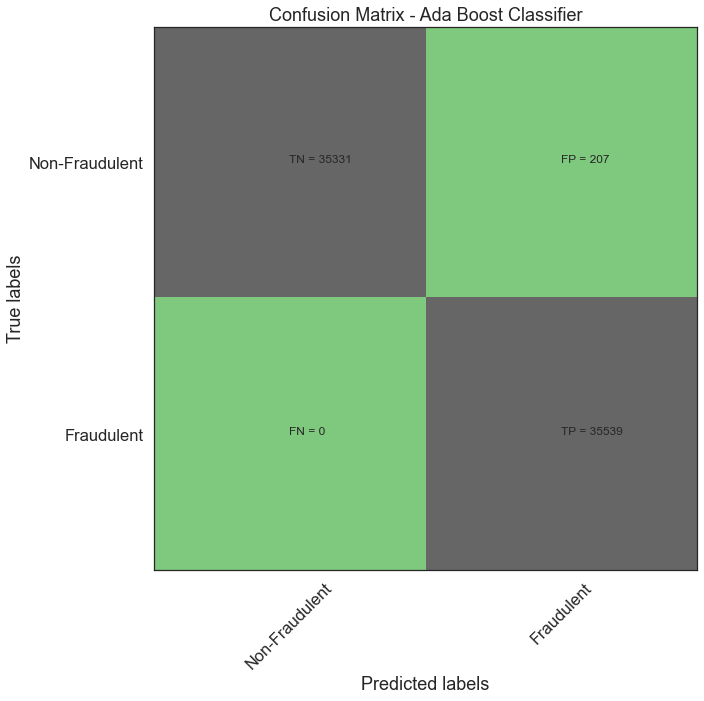

In [47]:
from sklearn.ensemble import AdaBoostClassifier

adb_model = AdaBoostClassifier(n_estimators=200, random_state=12)
adb_model.fit(x_train,y_train)
pred = adb_model.predict(x_test)
print_results("Ada Boost Classifier", y_test, pred)

Gradient Boosting Classifier
--------------------------------------------------------------------------
accuracy score :0.9935562840299956
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     35538
           1       0.99      1.00      0.99     35539

    accuracy                           0.99     71077
   macro avg       0.99      0.99      0.99     71077
weighted avg       0.99      0.99      0.99     71077



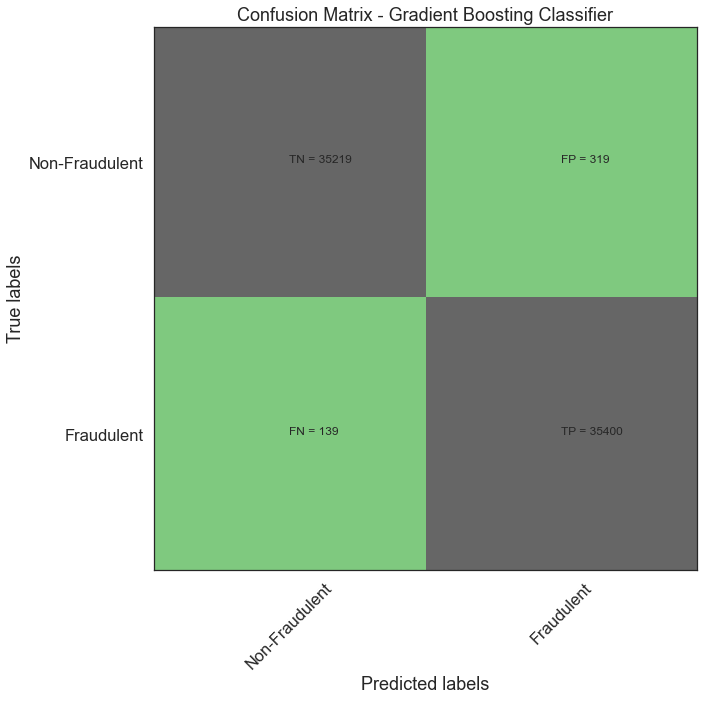

In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold

cv = KFold(n_splits=10, random_state=12, shuffle=True)
model = XGBClassifier(cv=cv,learning_rate=0.01)

gbc_model.fit(x_train,y_train)
pred = gbc_model.predict(x_test)
pred_prob = gbc_model.predict_proba(x_test)
print_results("Gradient Boosting Classifier", y_test, pred)

In [49]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.947733,0.976893,0.917161,0.946085
1,Logistic Regression CV,0.947733,0.976893,0.917161,0.946085
2,Bernoulli Naive Bayes,0.901403,0.989937,0.811053,0.891611
3,Random Forest Classifier + gini,0.999958,0.999916,1.000000,0.999958
4,Random Forest Classifier + entropy,0.999958,0.999916,1.000000,0.999958
5,Bagging Classifier,0.999887,0.999775,1.000000,0.999887
6,Gradient Boosting Classifier,0.993556,0.991069,0.996089,0.993573
7,Ada Boost Classifier,0.997088,0.994209,1.000000,0.997096
8,Gradient Boosting Classifier,0.993556,0.991069,0.996089,0.993573


###  Overall the random with gini  performed much better than other models as we can see that it  detected only 3 numbers of errors

We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.